<a href="https://colab.research.google.com/github/Kalim27/Employee-Registration/blob/main/ann%2C_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will classify small images using convolutional neural network cifar 10


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend
backend.clear_session()

Load the dataset

In [ ]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test **images**

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y train is a 2D array for our classification 1D array is good enough. So we will convert this to 1D

In [ ]:
y_train=y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test=y_test.reshape(-1,)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,5))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

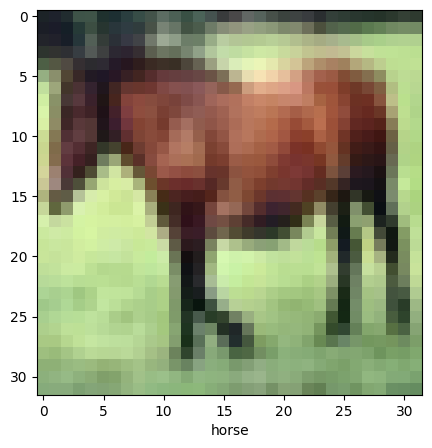

In [ ]:
plot_sample(x_train, y_train, 7)

Normalizing the training data

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

Build simple ann for  image classification

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [ ]:
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 134s 85ms/step - loss: 1.7543 - accuracy: 0.3790
Epoch 2/3
1563/1563 [==============================] - 131s 84ms/step - loss: 1.6070 - accuracy: 0.4333
Epoch 3/3
1563/1563 [==============================] - 130s 83ms/step - loss: 1.5311 - accuracy: 0.4582


You can see that at the end of 5 epochs , accuracy is at around 48.48%

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('Classification Report:\n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 23ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.33      0.42      1000
           1       0.59      0.49      0.54      1000
           2       0.37      0.23      0.29      1000
           3       0.39      0.24      0.30      1000
           4       0.39      0.43      0.41      1000
           5       0.41      0.33      0.37      1000
           6       0.43      0.64      0.51      1000
           7       0.65      0.40      0.49      1000
           8       0.36      0.83      0.50      1000
           9       0.49      0.51      0.50      1000

    accuracy                           0.44     10000
   macro avg       0.47      0.44      0.43     10000
weighted avg       0.47      0.44      0.43     10000



In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 56s 35ms/step - loss: 1.5098 - accuracy: 0.4570
Epoch 2/3
1563/1563 [==============================] - 54s 35ms/step - loss: 1.1762 - accuracy: 0.5875
Epoch 3/3
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0618 - accuracy: 0.6297


In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.0531 - accuracy: 0.6332


[1.0530683994293213, 0.6331999897956848]

In [ ]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[1.9289030e-03, 2.8257412e-04, 1.4647483e-02, 6.4016974e-01,
        7.6204808e-03, 8.3100297e-02, 6.9449745e-02, 4.3380188e-04,
        1.8215296e-01, 2.1397170e-04],
       [1.8667823e-02, 7.4168772e-01, 4.0437306e-05, 7.1278337e-06,
        2.4939969e-05, 3.1810026e-07, 1.7721172e-06, 2.1142621e-06,
        1.9492792e-01, 4.4639681e-02],
       [3.7149023e-02, 2.4275397e-01, 2.1220786e-03, 2.7690746e-03,
        1.6898739e-03, 6.3298969e-04, 9.0526341e-04, 5.2655424e-04,
        6.5958285e-01, 5.1868208e-02],
       [6.2696671e-01, 3.1621076e-02, 5.7125888e-03, 1.1558431e-03,
        2.7897777e-02, 9.6608434e-05, 2.2827375e-03, 1.5896354e-04,
        3.0154365e-01, 2.5639026e-03],
       [5.5483244e-05, 1.8345845e-04, 1.1635684e-02, 3.9919961e-02,
        5.2979457e-01, 1.3515514e-02, 4.0349624e-01, 2.8956810e-04,
        1.0701027e-03, 3.9411108e-05]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

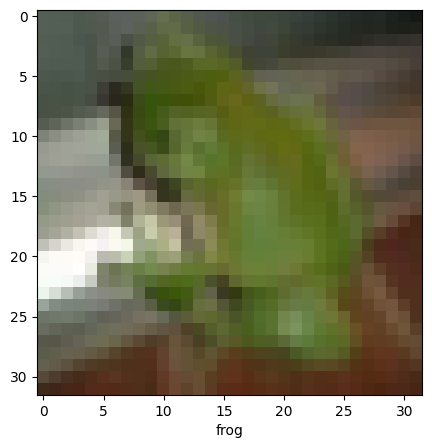

In [ ]:
plot_sample(x_test, y_test, 7)

In [ ]:
classes[y_classes[10]]

'airplane'